# DESAFIO LATAM

# FUNDAMENTOS DE DATA SCIENCE

# DIMENSIONALIDAD 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('cep45.csv')

In [3]:
df.head()

,corr,filtro,psu,region,p1_1,p1_2,p1_3,p2,p3,p4,...,de14_b,de14_c,de14_d,de14_e,de14_f,de15,de16,de17,b5,pond
0,1,937,150,13,9,3,6,1,3,2,...,2,2,2,2,2,6,4,4,1,0.782461
1,2,938,150,13,7,6,3,2,2,1,...,2,2,1,2,2,8,4,4,1,1.157864
2,3,939,150,13,3,6,9,2,2,3,...,2,2,2,2,2,9,6,4,1,1.204037
3,4,1096,182,13,3,4,11,3,2,2,...,2,2,2,2,2,6,3,3,1,1.025330
4,5,1097,182,13,6,11,7,3,1,1,...,2,2,2,2,2,6,3,3,1,1.204037


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Columns: 188 entries, corr to pond
dtypes: float64(34), int64(153), object(1)
memory usage: 2.2+ MB


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
df.loc[:,'conjunto':'variables'].applymap(lambda x: stats.zscore(x))

KeyError: 'conjunto'

# DESAFIO ANALISIS FACTORIAL

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import factor_analyzer as fact 
import missingno as msngo
import warnings
warnings.filterwarnings(action='ignore')
df = pd.read_csv('bfi.csv')
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

In [9]:
df.head()

,corr,filtro,psu,region,p1_1,p1_2,p1_3,p2,p3,p4,...,de14_b,de14_c,de14_d,de14_e,de14_f,de15,de16,de17,b5,pond
0,1,937,150,13,9,3,6,1,3,2,...,2,2,2,2,2,6,4,4,1,0.782461
1,2,938,150,13,7,6,3,2,2,1,...,2,2,1,2,2,8,4,4,1,1.157864
2,3,939,150,13,3,6,9,2,2,3,...,2,2,2,2,2,9,6,4,1,1.204037
3,4,1096,182,13,3,4,11,3,2,2,...,2,2,2,2,2,6,3,3,1,1.025330
4,5,1097,182,13,6,11,7,3,1,1,...,2,2,2,2,2,6,3,3,1,1.204037


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Columns: 188 entries, corr to pond
dtypes: float64(34), int64(153), object(1)
memory usage: 2.2+ MB


In [15]:
df = df.drop('Unnamed: 0', axis = 1)

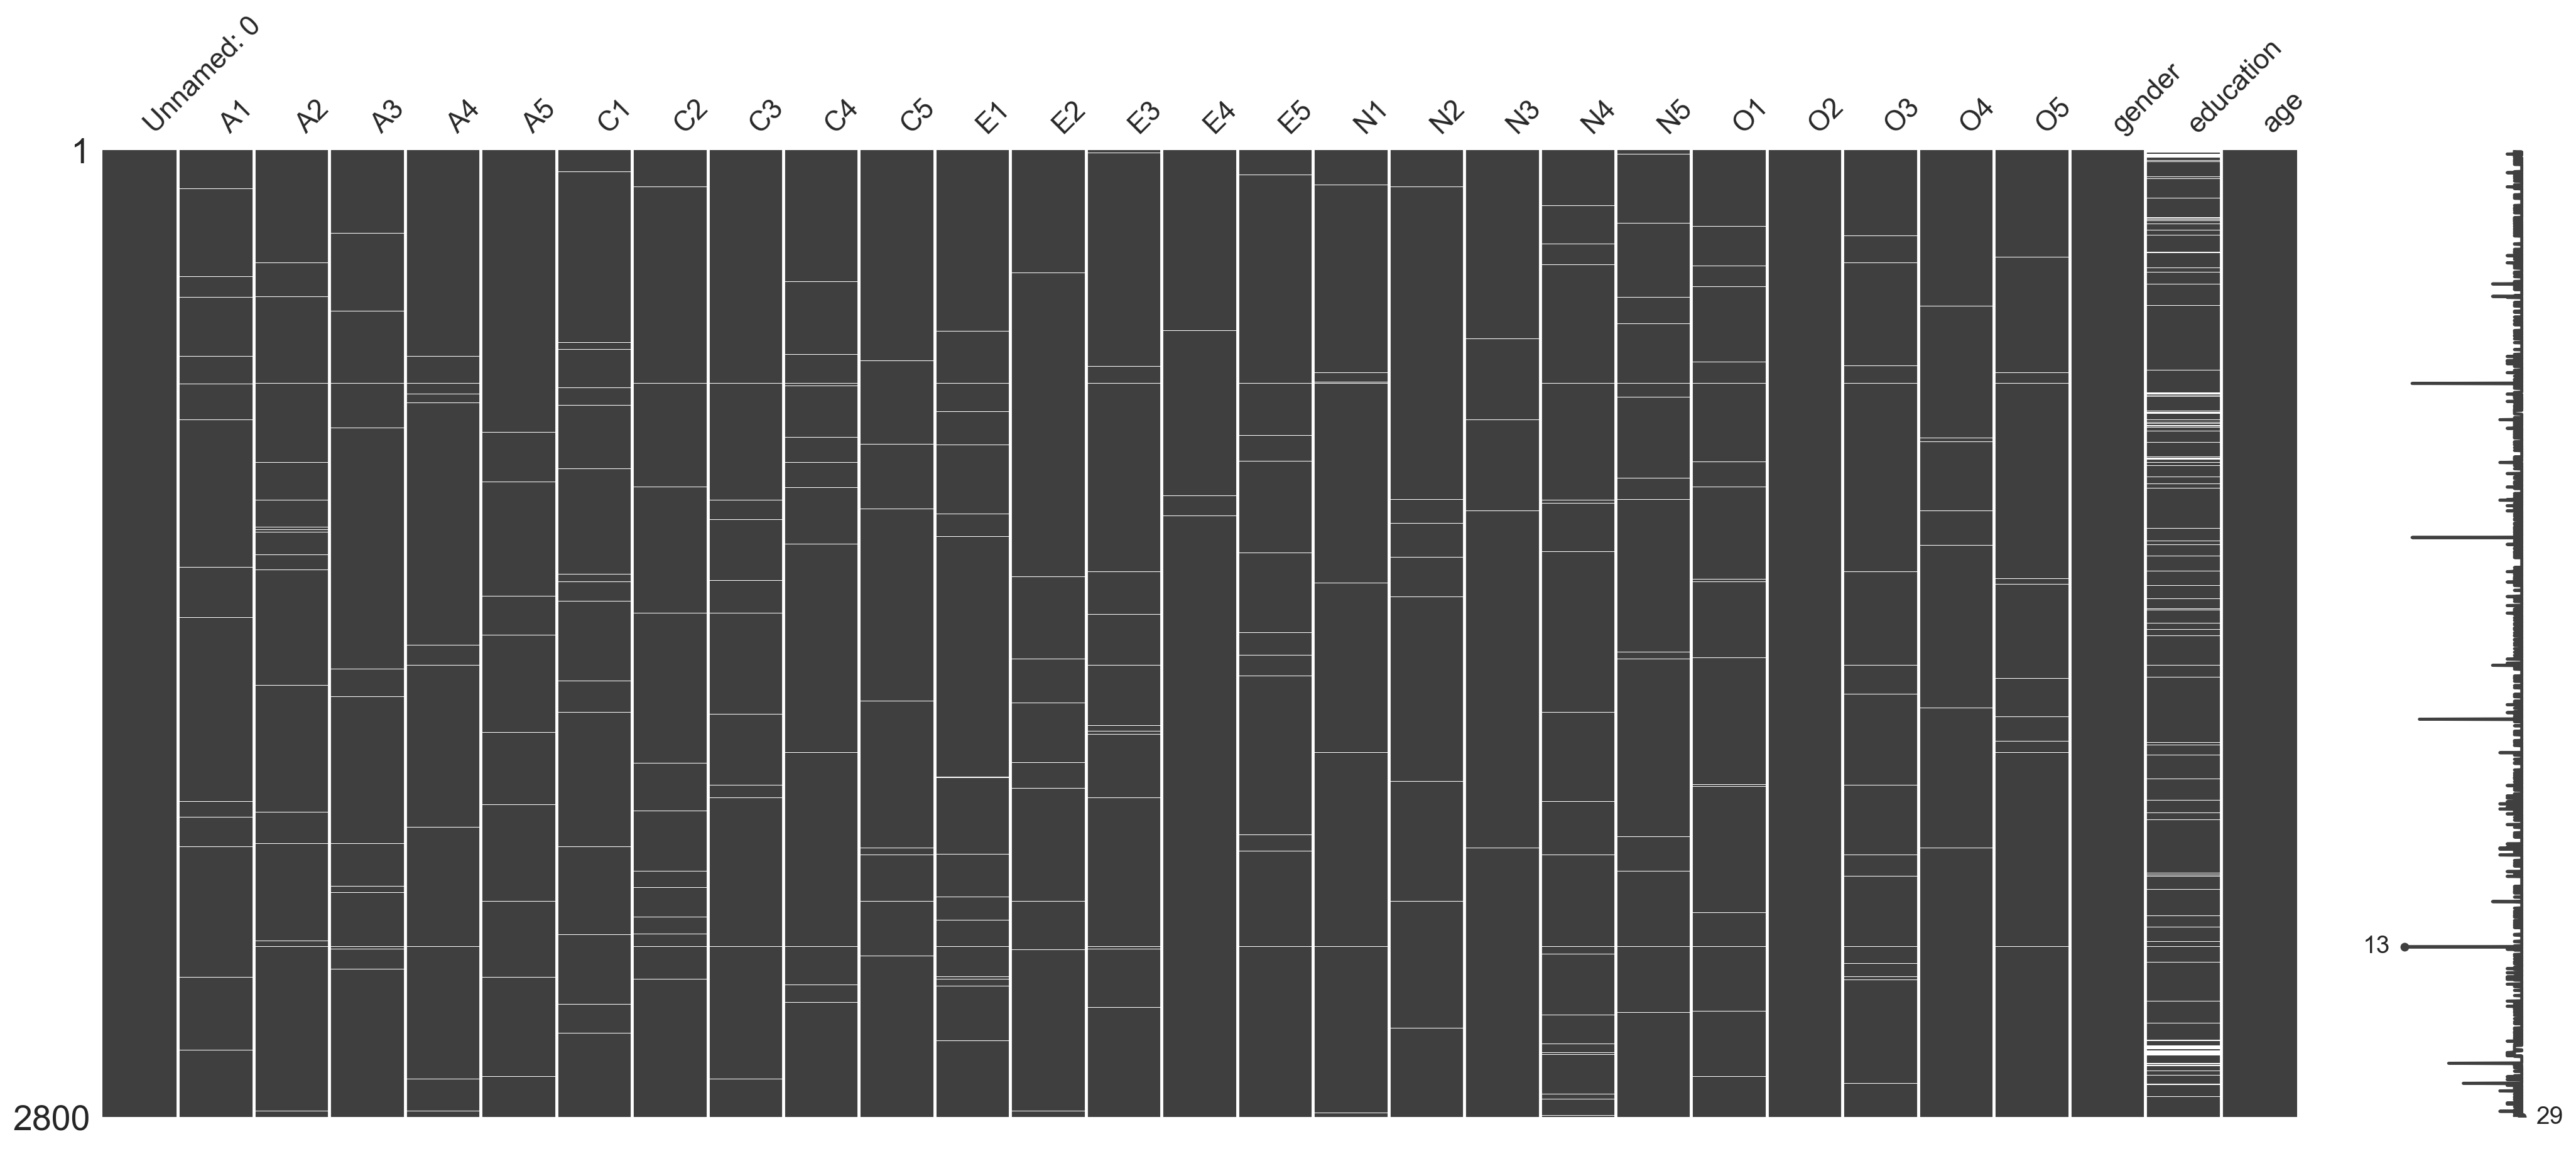

In [14]:
 msngo.matrix(df);

In [16]:
for colname, serie in df.iteritems(): 
    print(colname, "NA's %\n") 
    print(serie.isnull().value_counts('%'))

A1 NA's %

False    0.994286
True     0.005714
Name: A1, dtype: float64
A2 NA's %

False    0.990357
True     0.009643
Name: A2, dtype: float64
A3 NA's %

False    0.990714
True     0.009286
Name: A3, dtype: float64
A4 NA's %

False    0.993214
True     0.006786
Name: A4, dtype: float64
A5 NA's %

False    0.994286
True     0.005714
Name: A5, dtype: float64
C1 NA's %

False    0.9925
True     0.0075
Name: C1, dtype: float64
C2 NA's %

False    0.991429
True     0.008571
Name: C2, dtype: float64
C3 NA's %

False    0.992857
True     0.007143
Name: C3, dtype: float64
C4 NA's %

False    0.990714
True     0.009286
Name: C4, dtype: float64
C5 NA's %

False    0.994286
True     0.005714
Name: C5, dtype: float64
E1 NA's %

False    0.991786
True     0.008214
Name: E1, dtype: float64
E2 NA's %

False    0.994286
True     0.005714
Name: E2, dtype: float64
E3 NA's %

False    0.991071
True     0.008929
Name: E3, dtype: float64
E4 NA's %

False    0.996786
True     0.003214
Name: E4, dtype: floa

In [17]:
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 5 to 2799
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1         2236 non-null   float64
 1   A2         2236 non-null   float64
 2   A3         2236 non-null   float64
 3   A4         2236 non-null   float64
 4   A5         2236 non-null   float64
 5   C1         2236 non-null   float64
 6   C2         2236 non-null   float64
 7   C3         2236 non-null   float64
 8   C4         2236 non-null   float64
 9   C5         2236 non-null   float64
 10  E1         2236 non-null   float64
 11  E2         2236 non-null   float64
 12  E3         2236 non-null   float64
 13  E4         2236 non-null   float64
 14  E5         2236 non-null   float64
 15  N1         2236 non-null   float64
 16  N2         2236 non-null   float64
 17  N3         2236 non-null   float64
 18  N4         2236 non-null   float64
 19  N5         2236 non-null   float64
 20  O1      

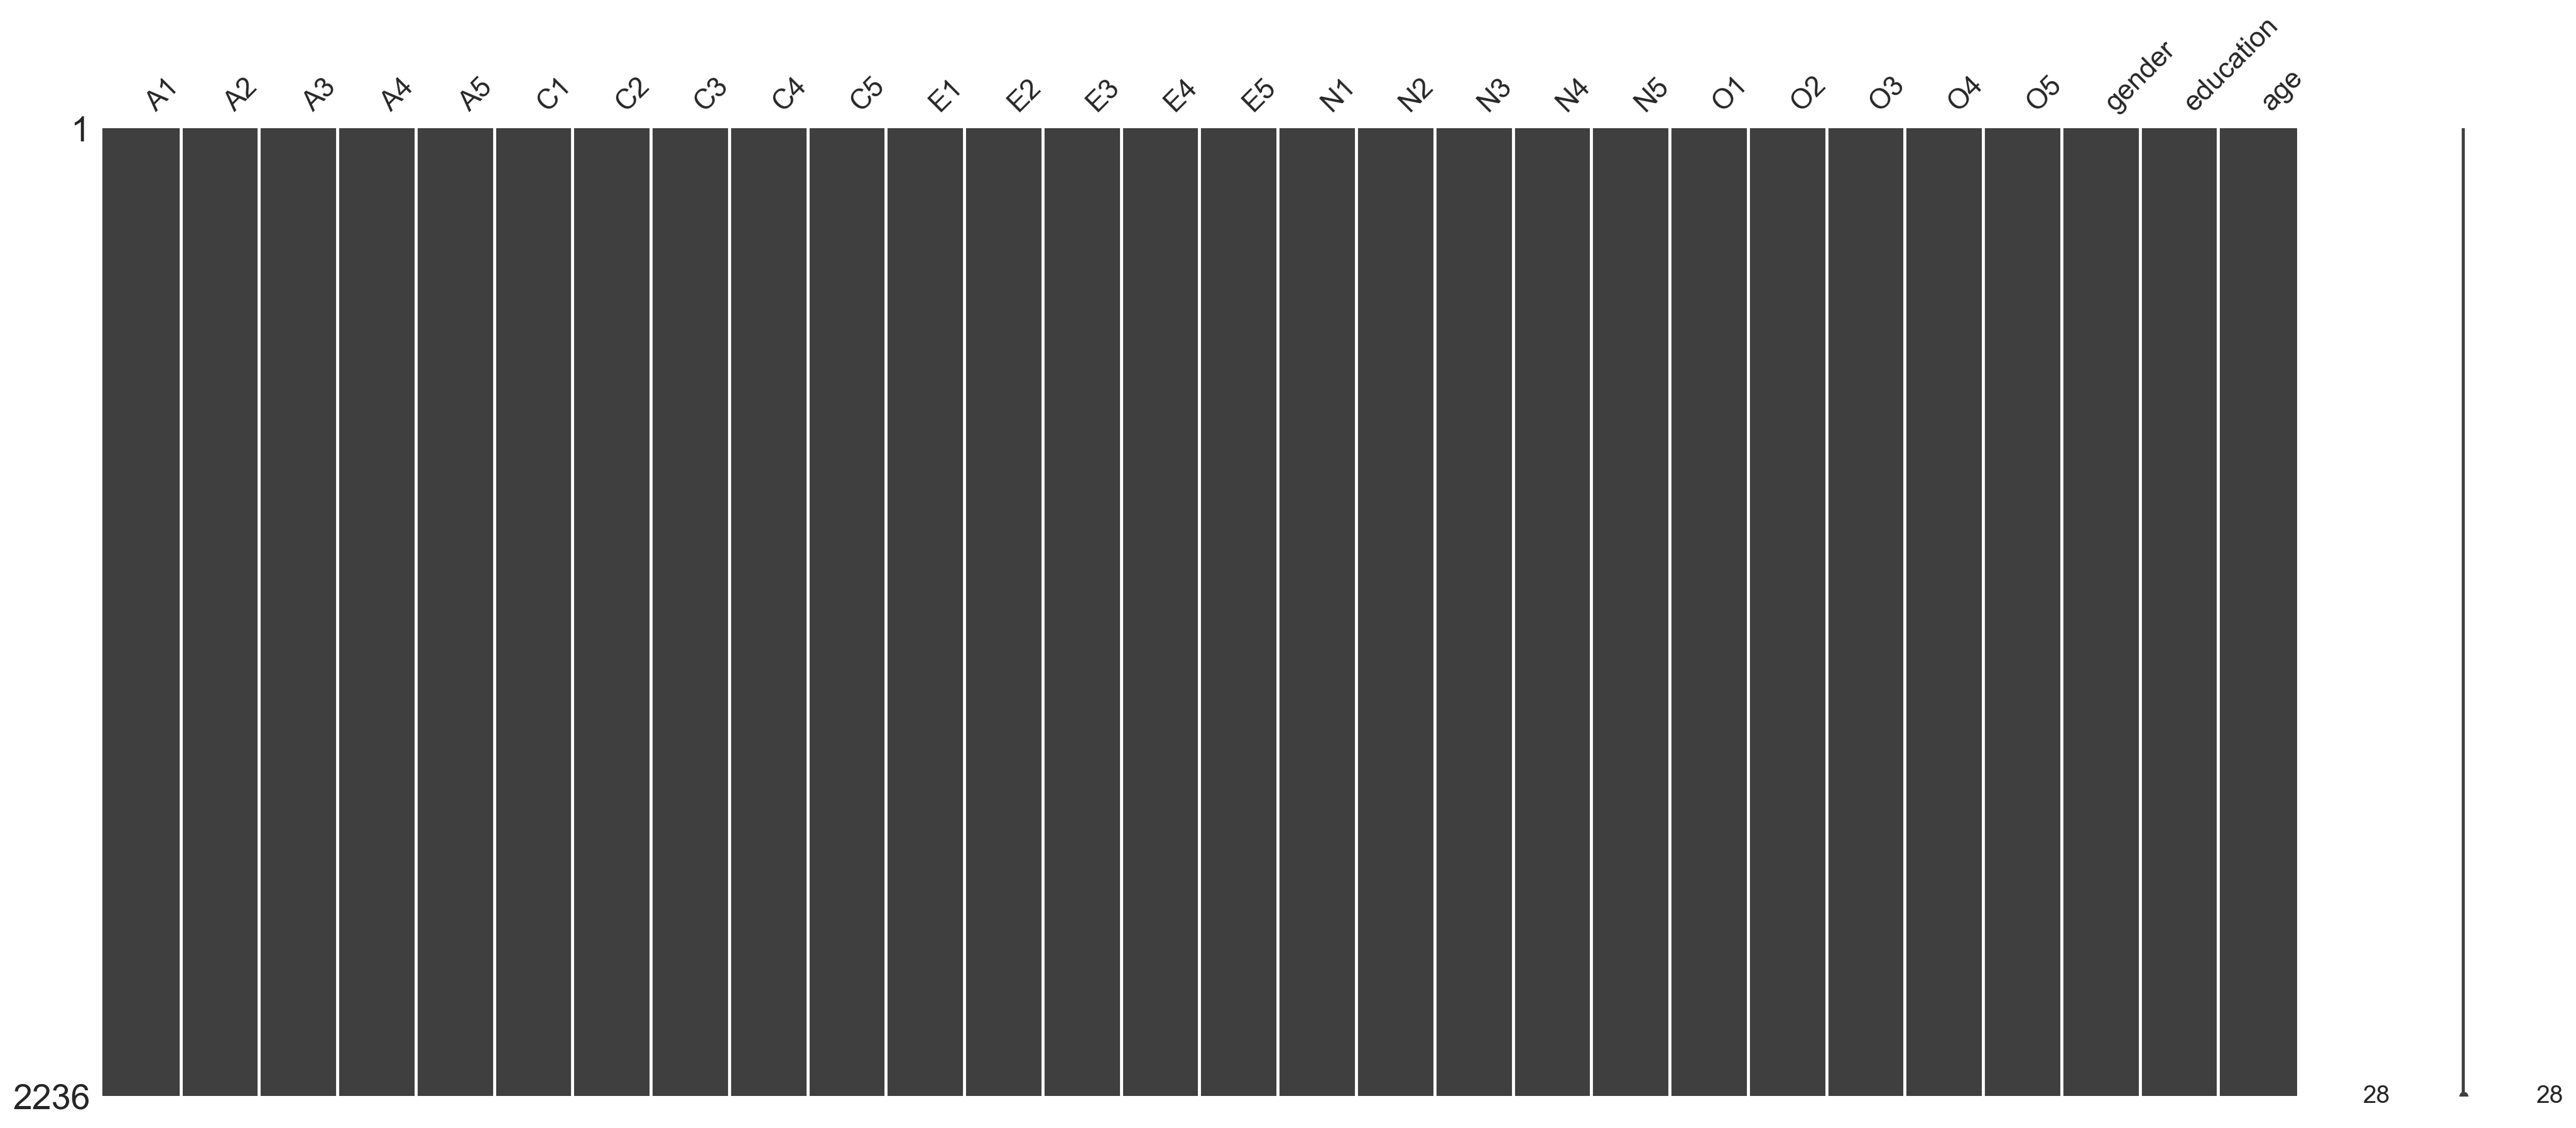

In [19]:
 msngo.matrix(df);

# Desafío 3: Descripción

In [20]:
personality_df = df.loc[:, 'A1':'O5']

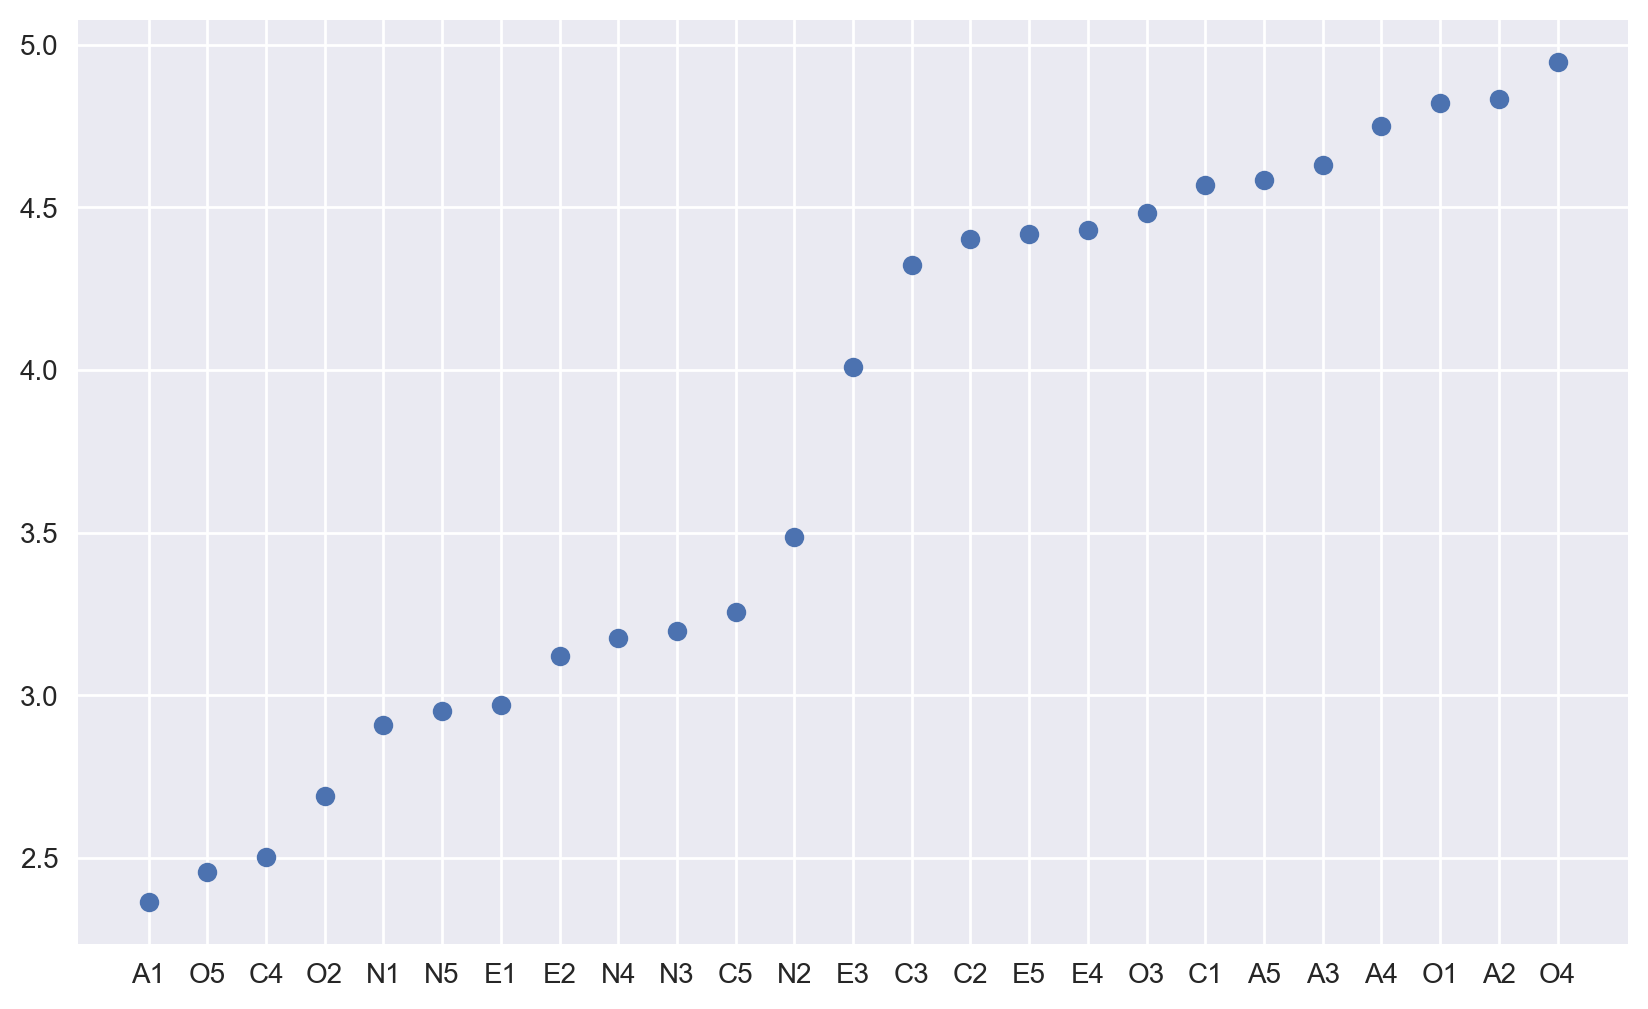

In [21]:
plt.plot(personality_df.mean().sort_values(), "o")

In [22]:
personality_corrs_abs = personality_df.corr()

<AxesSubplot:>

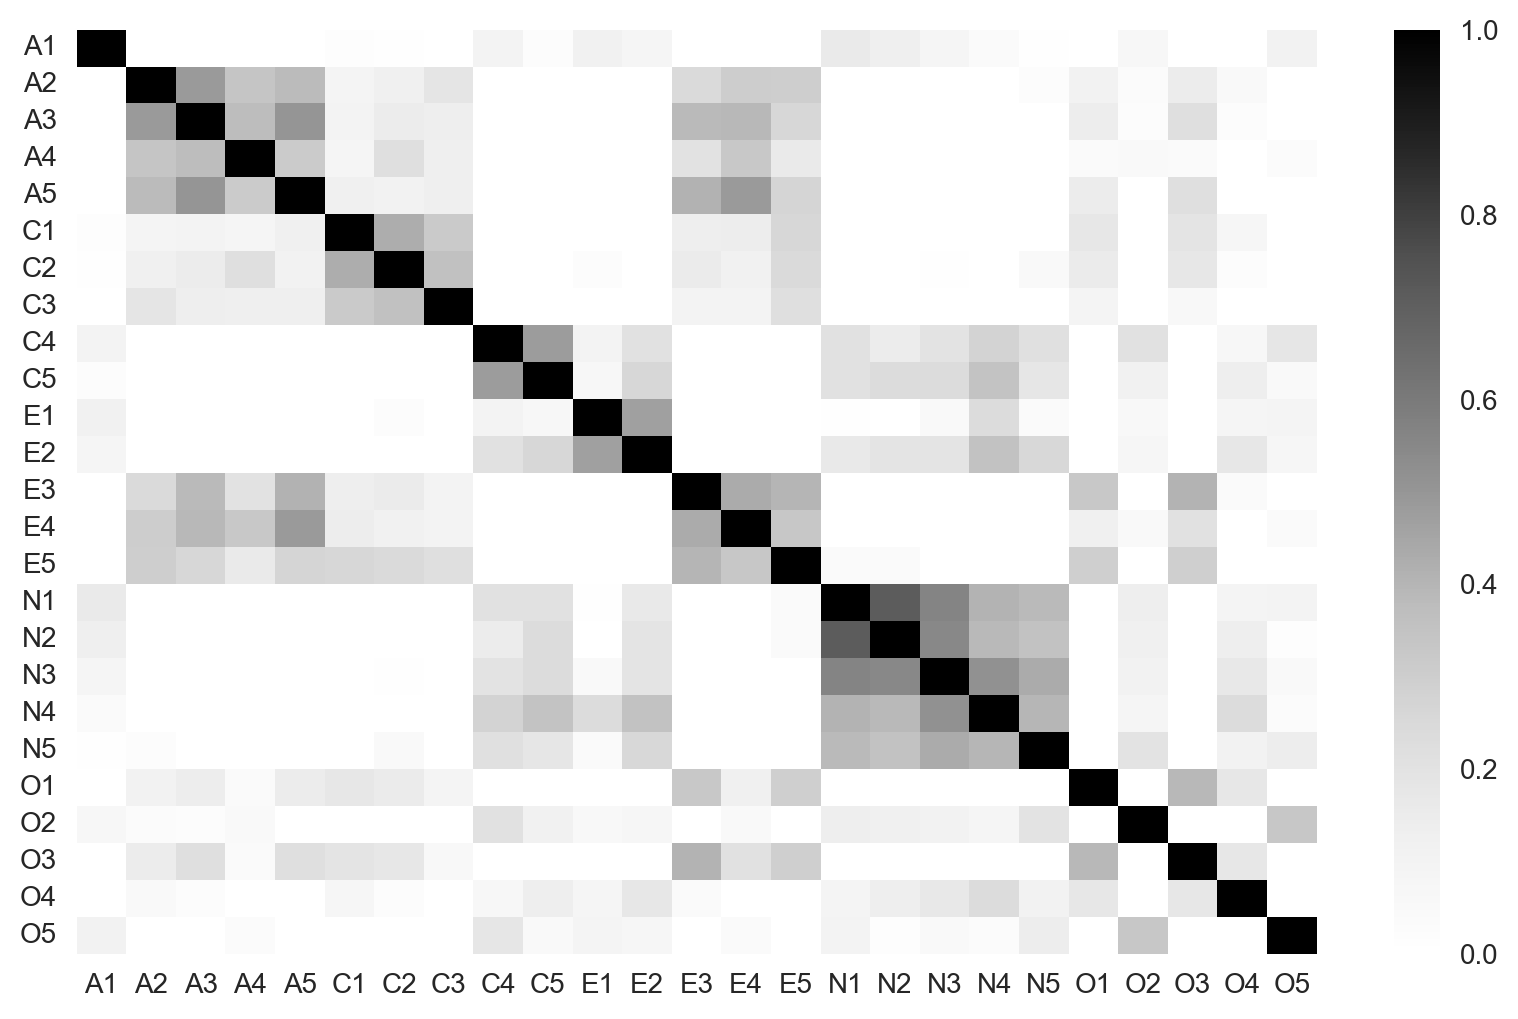

In [23]:
sns.heatmap(personality_corrs_abs, cmap='Greys', vmin=0.0, square=False)

# Desafío 4: Extracción de factores

In [24]:
fact.calculate_bartlett_sphericity(personality_df)

(16509.673550497202, 0.0)

In [25]:
fact.calculate_kmo(personality_df)

(array([0.73783211, 0.83426339, 0.87158082, 0.87042369, 0.90061871,
        0.83810325, 0.78841959, 0.84946345, 0.82364592, 0.86188771,
        0.84151427, 0.88389524, 0.89307072, 0.87818653, 0.89404239,
        0.7781268 , 0.77845262, 0.86005895, 0.88625489, 0.86049617,
        0.85501182, 0.78381059, 0.83374388, 0.78111794, 0.75804877]),
 0.8468295031833752)

In [26]:
personality_factor = fact.FactorAnalyzer(n_factors=6) 
personality_factor.fit(personality_df)

FactorAnalyzer(n_factors=6, rotation_kwargs={})

In [27]:
personality_eigenvalues = personality_factor.get_eigenvalues()[0]

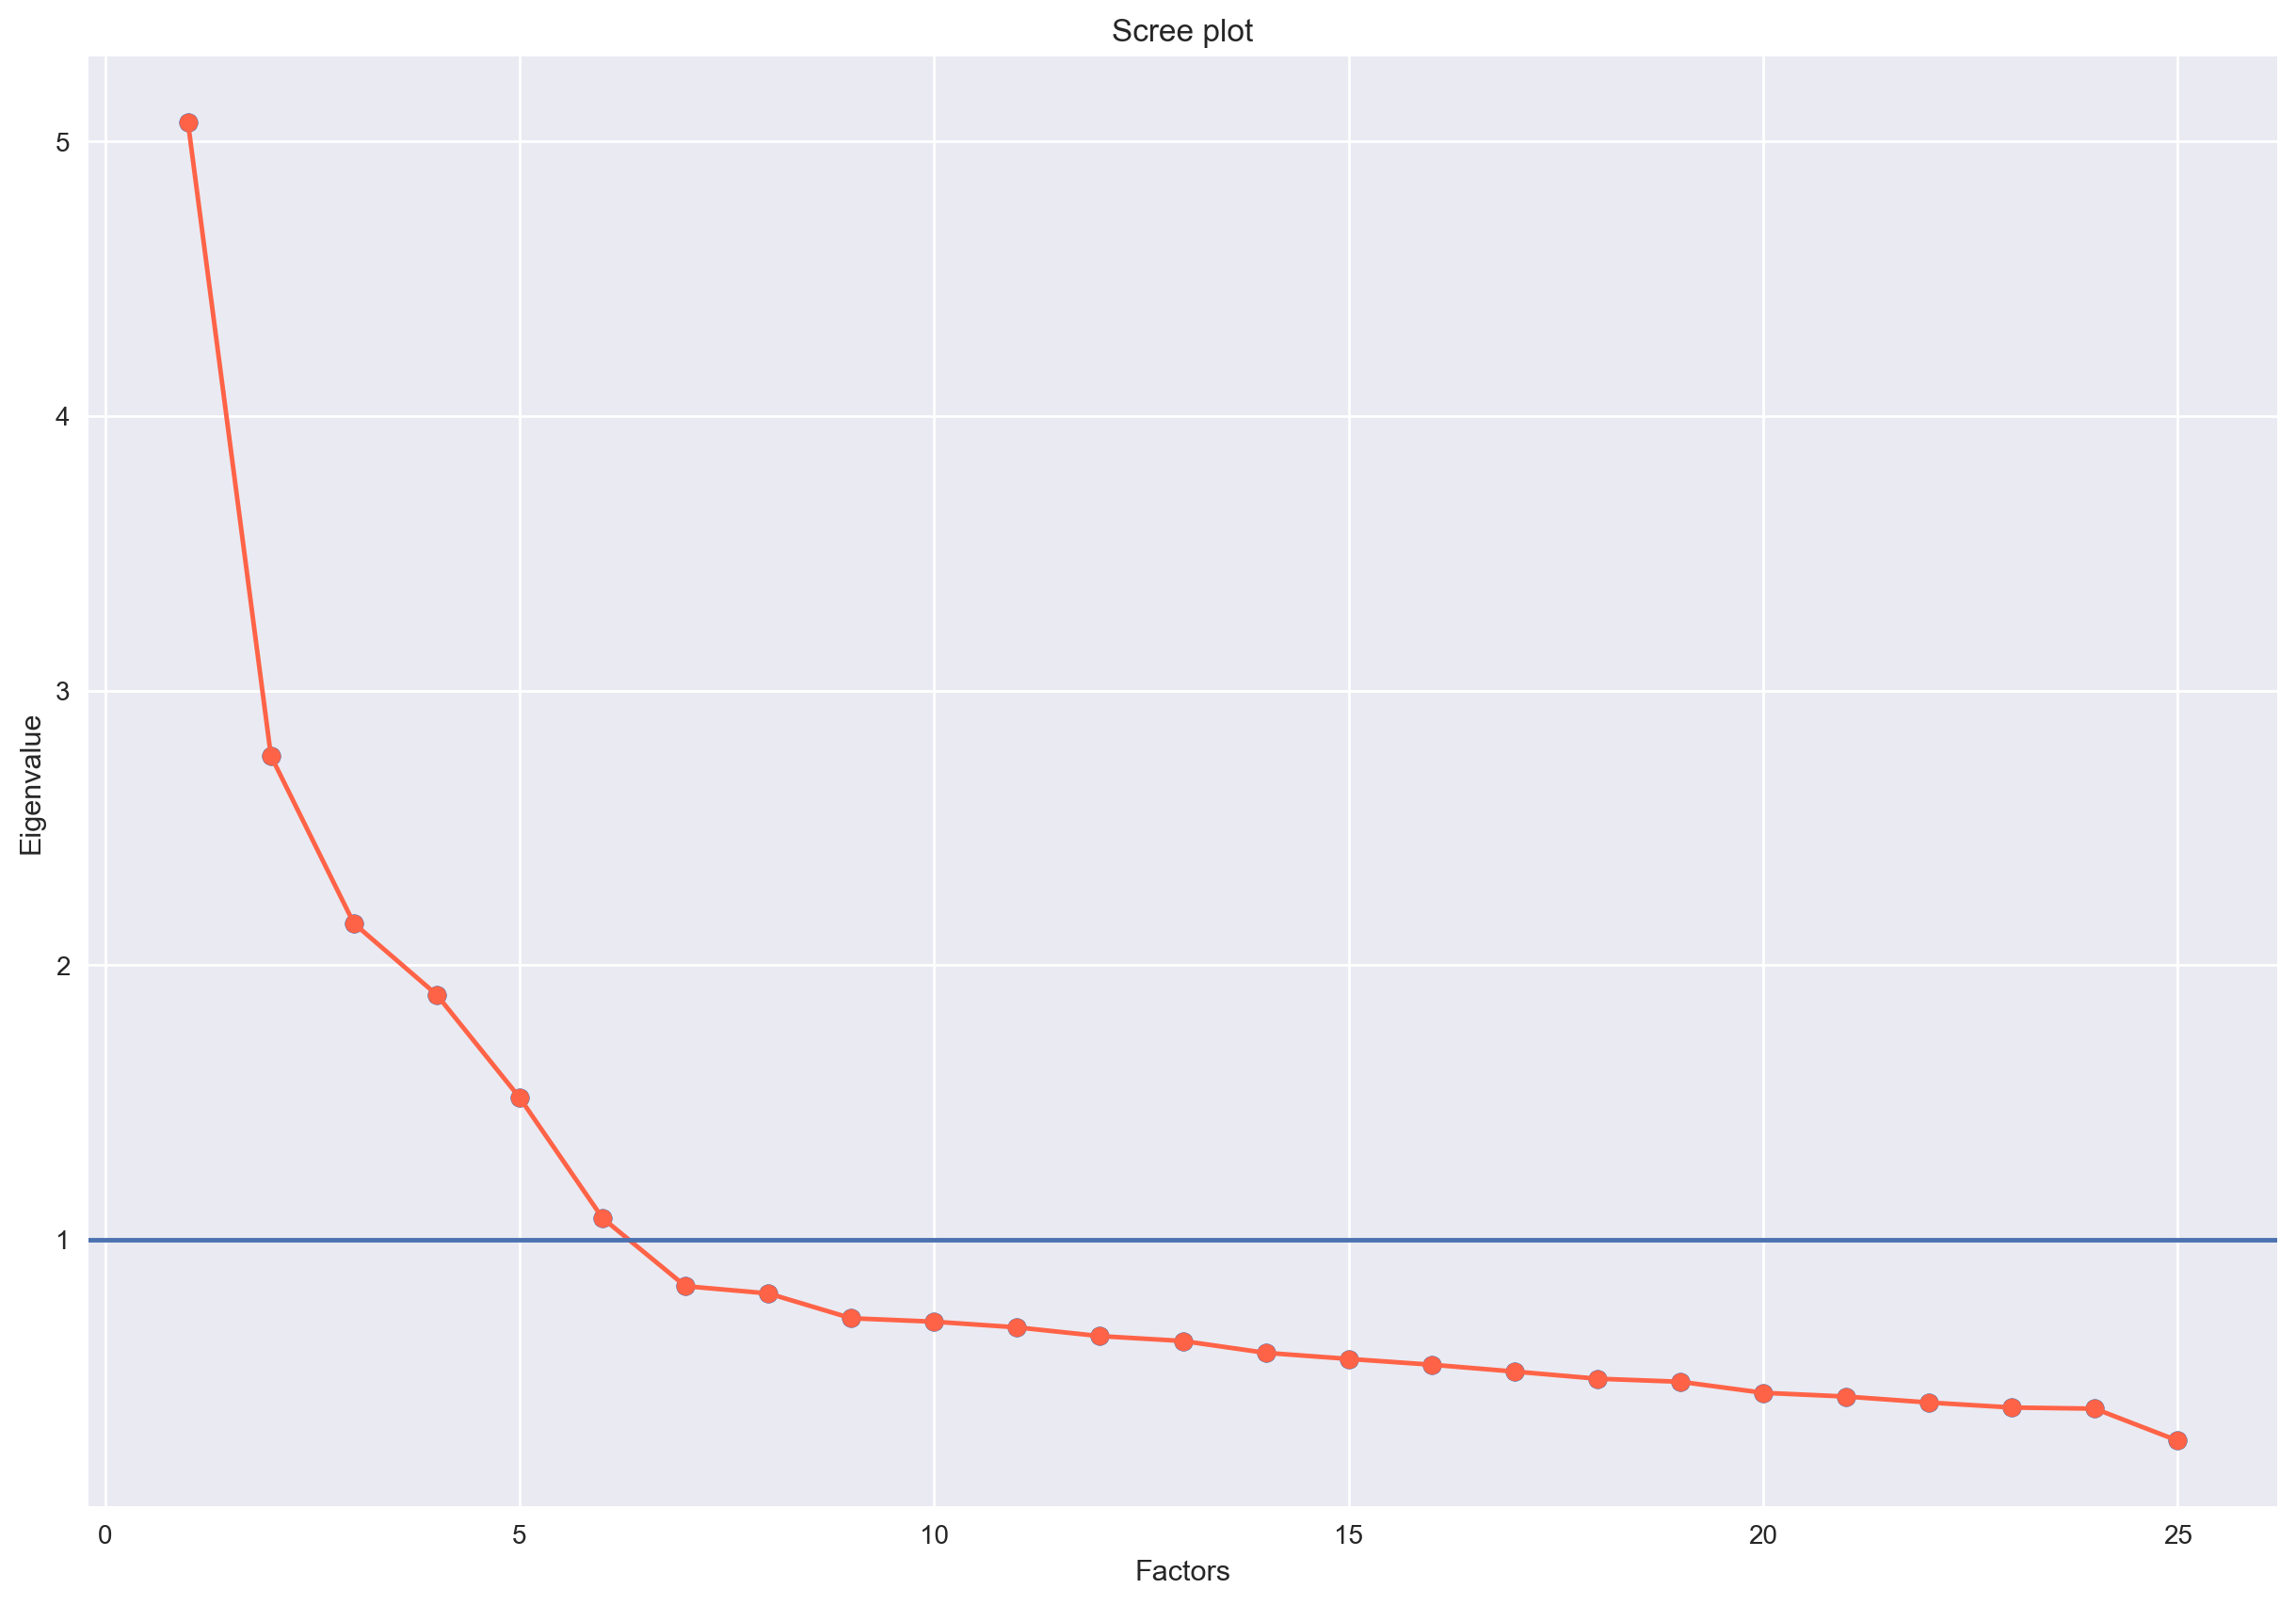

In [28]:
plt.figure(figsize=(15,10))
plt.scatter(range(1,personality_df.shape[1]+1),personality_eigenvalues)
plt.plot(range(1,personality_df.shape[1]+1), personality_eigenvalues,  'o-', color='tomato')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(1)
plt.title("Scree plot")
plt.show()

In [29]:
personality_loadings = personality_factor.loadings_
personality_loadings

array([[ 0.04424599,  0.08732614,  0.10630779,  0.14775216, -0.62321729,
         0.17473687],
       [ 0.11368602,  0.17964962,  0.05815394, -0.02598935,  0.63954146,
        -0.03974233],
       [ 0.00489421,  0.26906571,  0.02571255,  0.02073193,  0.48993031,
         0.18680318],
       [-0.04763319,  0.12925091,  0.19033621,  0.18247103,  0.32484374,
         0.06007357],
       [-0.16494203,  0.32359082, -0.01386535,  0.02980274,  0.3140843 ,
         0.28515062],
       [ 0.03532397, -0.04162308,  0.58879093, -0.13818821, -0.07677566,
        -0.00296578],
       [ 0.08136013, -0.12182411,  0.73784002, -0.01226394, -0.039509  ,
         0.03829778],
       [ 0.01570423, -0.07702098,  0.60828069,  0.05544249,  0.04390094,
        -0.10427803],
       [ 0.02590742,  0.02055363, -0.6717314 ,  0.11655467, -0.14057209,
         0.48014872],
       [ 0.15325314, -0.08739505, -0.55509591, -0.06515018, -0.00340265,
         0.236204  ],
       [-0.15842586, -0.6868344 ,  0.19816162,  0.

In [30]:
personality_loadings  = pd.DataFrame(data=personality_loadings)

In [31]:
personality_loadings_new = personality_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x,2))) 
personality_loadings_new

,0,1,2,3,4,5
0,,,,,,
1,,,,,0.64,
2,,,,,0.49,
3,,,,,,
4,,,,,,
5,,,0.59,,,
6,,,0.74,,,
7,,,0.61,,,
8,,,,,,0.48
9,,,,,,


In [ ]:
personality_scores = personality_factor.transform(personality_df)

In [ ]:
personality_scores  = pd.DataFrame(data =personality_scores )

In [ ]:
for colnames, serie in personality_scores.iteritems():
    df[str(colnames)] = serie

In [ ]:
df.head()

In [ ]:
df.drop(columns = ['Factor1', 'Factor2','Factor3','Factor4','Factor5' ], inplace=True)

In [ ]:
df.rename(columns = {'0':'Factor1','1':'Factor2','2':'Factor3','3':'Factor4', '4':'Factor5','5':'Factor6' }, inplace=True)

In [ ]:
df['gender'] = df['gender'].replace([1, 2], [1, 0])

In [ ]:
for i in df.loc[:, 'Factor1':'Factor6']: 
    print(i)
    print(smf.ols(i + "~ gender + education + age", df).fit().summary().tables[1])